In [2]:
#Nand Gate
x = [[1, 0, 0],
     [1, 0, 1],
     [1, 1 ,0],
     [1, 1, 2]]

y = [1, 1, 1, 0]

In [7]:
w = np.zeros(len(x[0]))
w

array([0., 0., 0.])

In [8]:
f = np.dot(w, x[0])
f

0.0

In [9]:
z = 0

In [10]:
if f>z:
    yHat = 1
else:
    yHat = 0

print(yHat)

0


In [146]:
class Perceptron():
    def __init__(self,  eta= 0.01, epochs = 50, random_state = 1):
        self.eta = eta
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X, y):
        self.errors = []
        rgen = np.random.RandomState(self.random_state)
        self.weights = rgen.normal(loc=0.0, scale=0.01,
        size=1 + X.shape[1])

        for i in range(self.epochs):
            error = 0
            for xi, yi in zip(X, y):
                update = self.eta * (yi - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self
        
    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
  

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("irishDataset.csv")

y = df.iloc[0:100, 4].values
y = np.where(y=='setosa', -1 , 1)

X = df.iloc[0:100, [0, 2]].values

ppn = Perceptron(eta= 0.1, epochs=10)
ppn.fit(X, y)

print(ppn.errors)

[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


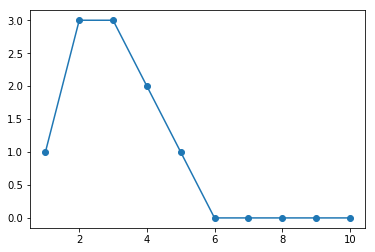

In [151]:
plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker = 'o')